In [75]:
import numpy as np
import matplotlib.pyplot as plt
import pandas
from scipy.optimize import curve_fit

In [167]:
def daction(x1,x,xm1,xp):
    dxn=xp-x
    sxn=xp+x
    sx1=x1+xm1
    
    delta_s=dxn*(sxn*(c1 + c2) -sx1*c1)
    
    return delta_s

def exp_fun(x, a, b, c):
    return  a*(np.exp(-b*x)) + c

def metro(config,num_lat_points):
    
    state=config
    points=num_lat_points
     
    for n in range(points):

        x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
        if n==0:
            delta=daction(state[n+1],state[n],state[points-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass

        elif n==(points-1):
            delta=daction(state[0],state[n],state[n-1],x_t)

            if np.exp(-delta)> (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
        else:
            delta=daction(state[n+1],state[n],state[n-1],x_t)

            if  np.exp(-delta) > (np.random.uniform(0,1)):
                np.put(state,[n],[x_t])
            else:
                pass
    return(state)
    

def thermalization(num_iter):
    tniter=num_iter 
    num_accept=0
    state=0*np.random.random_sample((points,))
    avg_pos=0*np.random.random_sample((tniter+1,))
    avg_pos2=0*np.random.random_sample((tniter+1,))

    for h in state:
            avg_pos[0]=avg_pos[0]+h
            avg_pos2[0]=avg_pos2[0]+h**2

    for m in range(tniter):

        for n in range(points):

            x_t=(np.random.uniform((state[n]-step), (state[n]+step)))
            if n==0:
                delta=daction(state[n+1],state[n],state[points-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

            elif n==(points-1):
                delta=daction(state[0],state[n],state[n-1],x_t)

                if np.exp(-delta)> (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass
            else:
                delta=daction(state[n+1],state[n],state[n-1],x_t)

                if  np.exp(-delta) > (np.random.uniform(0,1)):
                    np.put(state,[n],[x_t])
                    num_accept=num_accept+1
                else:
                    pass

        for h in state:
            avg_pos[m+1]=avg_pos[m+1]+h
            avg_pos2[m+1]=avg_pos2[m+1]+h**2

    avg_pos=avg_pos/points
    avg_pos2=avg_pos2/points
    print("Acceptance ratio :", num_accept/(tniter*points), "\n The acceptance ratio needs to be around 0.5. \n If it's too low try reducing 'step', and vv if it's too high. ")
    
    config=np.arange(tniter+1)

    plt.figure(1)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number')
    plt.plot(config, avg_pos2)
    plt.show()
    
    plt.figure(2)
    plt.xlabel('Configuration')
    plt.ylabel('Average distance squared')
    plt.title('Distance squared vs configuration number. Tuned axis')
    plt.plot(config, avg_pos2)
    plt.axis([0,400,0,max(avg_pos2)]) ####May need to tune x-axis
    plt.show()
    
    
def data(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    state=0*np.random.random_sample((points,)) #### Initial state
    f=open('data'+name+'.txt' , 'w')
    
    for m in range(ttime): #### thermalizaing state

        state=metro(state,100) #### config,num_lat_points    
    for h in state:
        f.write(str(h) + '\n')
    
    for m in range(niter):

        state=metro(state,100) #### config,num_lat_points
        
        for h in state:
            f.write(str(h) + '\n')
        
    f.close()

def corr(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    f=open('data'+name+'.txt' , 'r')
    data=f.readlines()
    f.close()
    corr=[]
    for n in range(corrt):
        
        sum1=0
        sum2=0
        for m in range(points):
            sum1=sum1+(eval(data[m])*eval(data[m+((n+1)*points)]))
        corr=np.append(corr,sum1/points)
    
    corr_time=np.arange(corrt)
    corr=corr/(max(corr))
    
    popt, pcov = curve_fit(exp_fun, corr_time, corr)
    
    plt.figure(1)
    plt.xlabel('Correlation time')
    plt.ylabel('Correlation')
    plt.title('Correlation graph')
    plt.plot(corr_time, exp_fun(corr_time, *popt))
    plt.plot(corr_time, corr)
    plt.show()
    
    plt.figure(2)
    plt.plot(corr_time, exp_fun(corr_time, *popt))
    plt.plot(corr_time,corr,'.')
    plt.axis([0,200,min(corr),max(corr)])
    plt.show()
            
    return (popt, pcov, data)
    
def binning(spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    bin_size=size_of_bin
    data=raw_data
    num_bins=int(niter/bin_size)
    
    f=open('binned_data'+name+'.txt' , 'w')
    
    
    for n in range(num_bins):
        
        sum1=0
        for m in range(bin_size):
            
            sum2=0
            for l in range(points):
                
                sum2=sum2+eval(data[l + (m+(n*bin_size))*points])
            sum1=sum1+sum2/points
            
        f.write(str(sum1/bin_size) + '\n')
         
    f.close()
    
    f=open('2binned_data'+name+'.txt' , 'w')
    
    for n in range(num_bins):
        
        sum1=0
        for m in range(bin_size):
            
            sum2=0
            for l in range(points):
                
                sum2=sum2+(eval(data[l + (m+(n*bin_size))*points]))**2
            sum1=sum1+sum2/points
            
        f.write(str(sum1/bin_size) + '\n')
         
    f.close()

    
    
    
def calc(spring_const,mass,lattice_spacing,num_config,num_lat_points):
    mu=spring_const
    m=mass
    a=lattice_spacing
    niter=num_config
    points=num_lat_points
    smu=str(mu)
    sm=str(m)
    sma=str(a)
    sniter=str(niter)
    spoints=str(points)
    name=smu+sm+sma+sniter+spoints
    
    f=open('2binned_data'+name+'.txt' , 'r')
    data=f.readlines()
    
    sum1=0
    for n in data:
        sum1=sum1+(eval(n))**2
    energy=(mu**2)*(sum1/len(data))
    print(energy)
    
    

# Parameters

In [165]:
mu=1.41 #### spring constant
m=0.5 #### mass
a=0.1 #### lattice spacing

#niter=int(10/a)
tniter=400 #### Number of iterations for thermalization
step=1 #### metropolis step
points=10 ####Number of lattice points

c1=m/a
c2=(a*(mu**2))/2

ttime=250 #### thermalization time
corrt = 400 #### correlation time

In [144]:
data(1.41,0.5,0.1,3000,100) #### spring_const,mass,lattice_spacing,num_config,num_lat_points

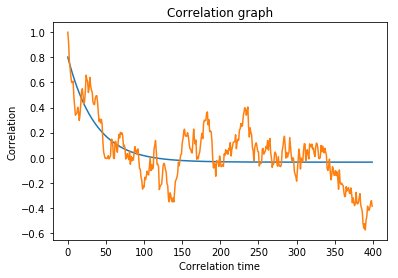

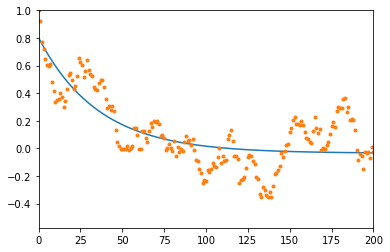

36


In [145]:
results=corr(1.41,0.5,0.1,3000,100) #### spring_const,mass,lattice_spacing,num_config,num_lat_points
bin_size=int(1/results[0][1] +1)
print(bin_size)


In [166]:
binning(1.41,0.5,0.1,3000,100,bin_size,results[2]) #### spring_const,mass,lattice_spacing,num_config,num_lat_points,size_of_bin,raw_data




In [168]:
calc(1.41,0.5,0.1,3000,100) ####spring_const,mass,lattice_spacing,num_config,num_lat_points

0.4741850456664306


Acceptance ratio : 0.47325 
 The acceptance ratio needs to be around 0.5. 
 If it's too low try reducing 'step', and vv if it's too high. 


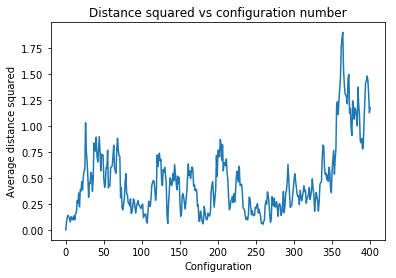

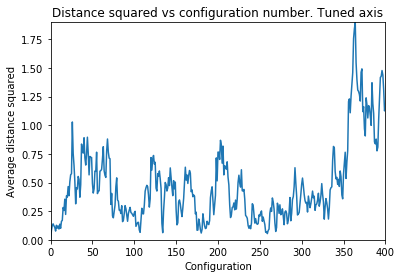

In [163]:
thermalization(tniter)

In [121]:
print(1/results[0][1])
bin_size=int(1/results[0][1] +1)
print(bin_size)

29.4921767234
30


In [9]:
state=0*np.random.random_sample((points,))
print(state)
state=metro(state)
for h in state:
    print(h)
print(state)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
0.0
0.0
0.393443280001
-0.0691629469475
0.0
0.0
0.0532327505351
0.0
0.143962724904
0.0
[ 0.          0.          0.39344328 -0.06916295  0.          0.
  0.05323275  0.          0.14396272  0.        ]


In [44]:
for m in range(5): #### thermalizaing state

    state=metro(state)

for h in state:
    print(h)

for m in range(10):

    state=metro(state)

    for h in state:

        print(h)

-0.18809428788
-0.489623135546
-0.14928350657
0.136586587681
-0.140194725407
0.0463533281049
-0.12567815604
0.108358249192
-0.197488438007
-0.0109625925767
-0.18809428788
-0.489623135546
-0.00893980171868
0.52964657475
0.350718057381
-0.208811581686
0.273849160855
-0.108958820873
-0.197488438007
-0.193704244674
0.407308741137
0.203246666254
-0.0260584436132
0.0191366941952
0.348161726549
0.58782976642
0.273849160855
-0.108958820873
0.414191033127
-0.193704244674
0.120930159193
0.203246666254
0.00814835155247
-0.0269805515768
0.348161726549
0.58782976642
-0.00489113154122
0.613667758573
0.112929184502
-0.193704244674
0.120930159193
0.203246666254
0.00814835155247
-0.0269805515768
-0.146835284171
0.546757676177
-0.318760267921
0.31100416656
-0.227588066809
0.457248556445
-0.0491506497685
0.0237232315355
0.00814835155247
-0.0269805515768
-0.146835284171
0.546757676177
-0.318760267921
0.31100416656
0.242201657175
0.457248556445
0.403058079227
0.0237232315355
0.00814835155247
-0.42213322011

In [51]:
f=open('test.txt' , 'w')
    
for m in range(ttime): #### thermalizaing state

    state=metro(state)
print(state)

for h in state:
    f.write(str(h) + '\n')

for m in range(10):

    state=metro(state)

    for h in state:
        f.write(str(h) + '\n')

f.close()

[ 1.6694313   1.49849148  1.08000755  1.19063849  0.20098927  0.67366841
  1.13368161  1.1548348   2.03874579  2.26340544]


In [10]:
metro(state)

array([ 0.19588397,  0.94379448,  0.39344328, -0.06916295,  0.        ,
        0.        ,  0.05323275,  0.58459011,  0.14396272,  0.        ])